WeatherPy
Analysis
As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
## way set up in starter code import api_keys
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

In [5]:
#taking a sample look at cities list
cities[:10]

['hithadhoo',
 'nikel',
 'scarborough',
 'florianopolis',
 'kapaa',
 'mulege',
 'mount isa',
 'srednekolymsk',
 'albany',
 'attawapiskat']

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
#notes #query_url = base_url + "appid=" + api_key +"&q=" + city
#notes #print(query_url)

In [7]:
#Create empty list to hold data for dataframe
city_list = []
cloudiness = []
country = []
date = []
humidity = []
long = []
lat = []
max_temp = []
wind_speed = []

In [8]:
#use city list to call APIs for each city in the list. Store the data from the api into the empty list
print("Beginning Data Retrieval \n ____________________________________")
for i, city in enumerate(cities):
    query_url = base_url + "appid=" + api_key + "&q=" + city
    response = requests.get(query_url).json()
    
    try:
        result = response['name']
        city_list.append(response['name'])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        long.append(response["coord"]["lon"])
        lat.append(response["coord"]["lat"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        print(f" Processing Record {i} | {result}")
        
    except (KeyError):
              print("City not found. Skipping")

Beginning Data Retrieval 
 ____________________________________
 Processing Record 0 | Hithadhoo
 Processing Record 1 | Nikel
 Processing Record 2 | Scarborough
 Processing Record 3 | Florianopolis
 Processing Record 4 | Kapaa
 Processing Record 5 | Mulege
 Processing Record 6 | Mount Isa
 Processing Record 7 | Srednekolymsk
 Processing Record 8 | Albany
City not found. Skipping
 Processing Record 10 | Hobart
 Processing Record 11 | Beringovskiy
 Processing Record 12 | Mar del Plata
 Processing Record 13 | Barrow
City not found. Skipping
 Processing Record 15 | Medvezhyegorsk
 Processing Record 16 | Sao Geraldo do Araguaia
 Processing Record 17 | Egvekinot
 Processing Record 18 | Akureyri
 Processing Record 19 | Sitka
 Processing Record 20 | Yellowknife
 Processing Record 21 | Faanui
 Processing Record 22 | Mataura
City not found. Skipping
 Processing Record 24 | Luderitz
 Processing Record 25 | Bluff
 Processing Record 26 | Saint-Philippe
City not found. Skipping
 Processing Record 28

 Processing Record 248 | Warkworth
 Processing Record 249 | Walvis Bay
 Processing Record 250 | Fenelon Falls
 Processing Record 251 | Tuatapere
 Processing Record 252 | Arraial do Cabo
 Processing Record 253 | Tumsar
 Processing Record 254 | Yar-Sale
City not found. Skipping
 Processing Record 256 | Riviere-au-Renard
 Processing Record 257 | Livadiya
 Processing Record 258 | Vallenar
 Processing Record 259 | Manjeshwar
 Processing Record 260 | Thompson
 Processing Record 261 | Tarabuco
City not found. Skipping
 Processing Record 263 | Porto Novo
 Processing Record 264 | Viedma
 Processing Record 265 | Chilca
 Processing Record 266 | La Ronge
 Processing Record 267 | Sisimiut
 Processing Record 268 | Tasiilaq
 Processing Record 269 | Isla Mujeres
 Processing Record 270 | Altamont
 Processing Record 271 | Karratha
 Processing Record 272 | Namibe
 Processing Record 273 | Zyryanka
 Processing Record 274 | Pacific Grove
 Processing Record 275 | Gobabis
 Processing Record 276 | Phultala
 Pr

 Processing Record 494 | Zhangye
 Processing Record 495 | Turukhansk
 Processing Record 496 | Sapozhok
 Processing Record 497 | Alice
 Processing Record 498 | Novikovo
 Processing Record 499 | Chapais
 Processing Record 500 | Saint-Augustin
 Processing Record 501 | Sao Miguel do Araguaia
 Processing Record 502 | Sao Filipe
 Processing Record 503 | Tutoia
 Processing Record 504 | Cockburn Town
 Processing Record 505 | Wajima
 Processing Record 506 | Bambanglipuro
City not found. Skipping
 Processing Record 508 | Ambon
 Processing Record 509 | Petropavlovsk-Kamchatskiy
 Processing Record 510 | Urrao
 Processing Record 511 | Purpe
 Processing Record 512 | Balkanabat
 Processing Record 513 | Agirish
 Processing Record 514 | Saint-Joseph
 Processing Record 515 | Sao Simao
 Processing Record 516 | Vyshchetarasivka
 Processing Record 517 | Gerash
 Processing Record 518 | Popova
 Processing Record 519 | Healdsburg
 Processing Record 520 | Hirara
 Processing Record 521 | Rawson
 Processing Reco

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
#creating data frame with list that hold data from API calls
city_weather_df = pd.DataFrame({"City": city_list,
                                "Cloudiness": cloudiness,
                                "Country": country,
                                "Date": date,
                                "Humidity": humidity,
                                "Lat": lat,
                                "Lng": long,
                                "Max Temp": max_temp,
                                "Wind Speed": wind_speed
                                
                               })

city_weather_df.head()
#city_weather_df.count()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Hithadhoo,76,MV,1539017910,97,-0.60,73.08,302.405,6.61
1,Nikel,40,NO,1539015600,80,69.41,30.21,275.150,13.40
2,Scarborough,68,GB,1539013800,67,54.28,-0.41,289.150,5.10
3,Florianopolis,90,BR,1539015420,94,-27.60,-48.55,294.150,3.10
4,Kapaa,90,US,1539014460,79,22.08,-159.32,299.250,5.10


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

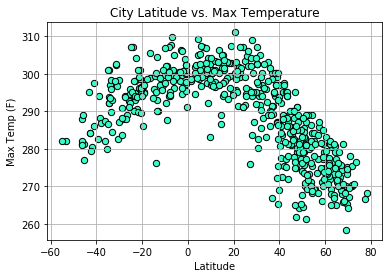

In [13]:
lat_temp_chart = city_weather_df.plot(kind="scatter", x=["Lat"], y=["Max Temp"], title="City Latitude vs. Max Temperature", grid=True, c = "#33FFCA", edgecolor="Black", s = 40)
lat_temp_chart.set_xlabel("Latitude")
lat_temp_chart.set_ylabel("Max Temp (F)")

plt.show()
#plt.tight_layout()

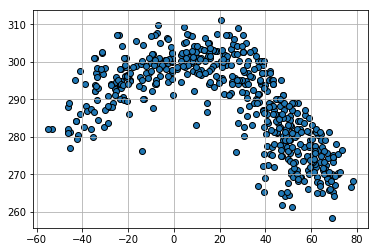

In [14]:
#Alternative way to plot data
x_axis = city_weather_df["Lat"]
y_axis = city_weather_df["Max Temp"]
l_t_chart = plt.scatter(x_axis, y_axis, edgecolor="Black")
plt.grid()
plt.show()

#### Latitude vs. Humidity Plot

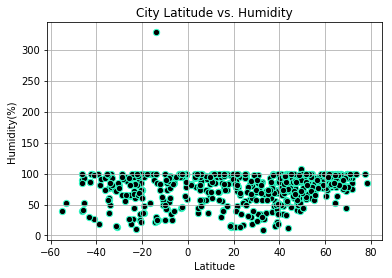

In [15]:
lat_humidity_chart = city_weather_df.plot(kind="scatter", x=["Lat"], y=["Humidity"], title="City Latitude vs. Humidity", grid=True, edgecolors="#33FFCA", c="black", s=40)
lat_humidity_chart.set_xlabel("Latitude")
lat_humidity_chart.set_ylabel("Humidity(%)")

plt.show()

#### Latitude vs. Cloudiness Plot

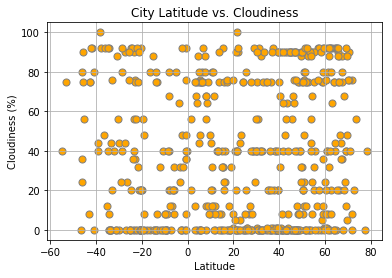

In [16]:
lat_cloudiness_chart = city_weather_df.plot(kind="scatter", x=["Lat"], y=["Cloudiness"], grid=True, title="City Latitude vs. Cloudiness", edgecolors="gray", c="orange", s=50)
lat_cloudiness_chart.set_xlabel("Latitude")
lat_cloudiness_chart.set_ylabel("Cloudiness (%)")

plt.show()

#### Latitude vs. Wind Speed Plot

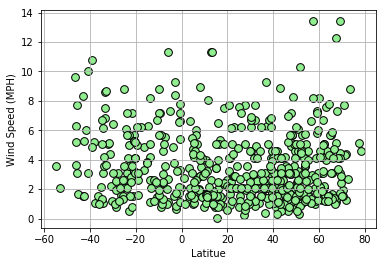

In [17]:
lat_windspeed_chart = city_weather_df.plot(kind="scatter", x=["Lat"], y=["Wind Speed"], grid=True, edgecolors="black", c="lightgreen", s=60)
lat_windspeed_chart.set_xlabel("Latitue")
lat_windspeed_chart.set_ylabel("Wind Speed (MPH)")

plt.show()